# Solving Differential Equations

In this notebook I'll show how one can solve differential equations with known initial conditions in python.  Note that it is possible to find general solutions to differential equations on a computer, using programs like [Mathematica](https://reference.wolfram.com/language/howto/SolveADifferentialEquation.html) or python's [sympy](https://www.sympy.org/scipy-2017-codegen-tutorial/notebooks/20-ordinary-differential-equations.html), however here I'll just focus on situations where you know the initial condition.  We'll use this to check some of our answers from the tutorial.

To solve an ODE in python, we can use `odeint(dydx, y0, x)` from scipy's integrate package.  We have to give this three arguments:
1. A function, `dydx`,of $y$ and $x$ that specifies the derivative $dy/dx$,
2. The initial condition of $y$,`y0` and
3. the $x$ positions we'd like to evaluate the solution at `x`. 
Below I'll show a couple of examples of using this.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

In the tutorial, we found that the differential equation
$$\frac{dy}{dx} = \frac{x^2 - \tan y}{x} \cos^2 y$$
with the boundary condition that $y(x=1) = \pi/4$ has the solution
$$
y(x) = \arctan \left[ \frac{x^3}{3} + \frac{2}{3x} \right] .
$$

In [55]:
def dydx(y,x):
    return np.cos(y)**2 * ( x**2 - np.tan(y) )/x
y0 = np.pi/4.0
xv = np.linspace(1,np.pi,500)

sln = spi.odeint(dydx, y0, xv)

def analytic(x):
    return np.arctan(x**2/3 + 2/(3*x))

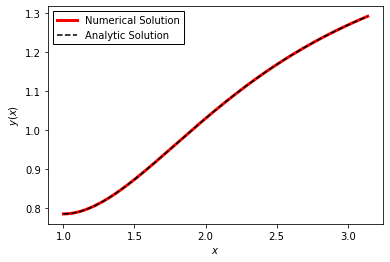

In [58]:
plt.figure()
plt.plot(xv, sln, 'r-', lw=3, label="Numerical Solution")
plt.plot(xv, analytic(xv), 'k--', lw=2, label="Analytic Solution")
plt.legend(fancybox=False, edgecolor="k", framealpha=1)
plt.xlabel("$x$"); plt.ylabel("$y(x)$")
plt.show()

We also found that the differential equation
$$
    \frac{dy}{dx} = y^4 - \frac{y}{x}
$$
with the boundary condition that $y(x=1) = (2/3)^{1/3}$, has solution
$$y(x) = \left( \frac{2}{3x} \right)^{1/3}.$$

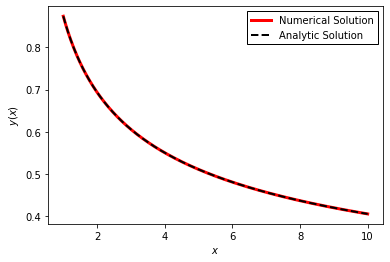

In [60]:
def dydx(y,x):
    return y**4 - y/x
y0 = (2.0/3.0)**(1.0/3.0)
xv = np.linspace(1,10,500)

sln = spi.odeint(dydx, y0, xv)

def analytic(x):
    return (2.0/(3.0*x))**(1.0/3.0)

plt.figure()
plt.plot(xv, sln, 'r-', lw=3, label="Numerical Solution")
plt.plot(xv, analytic(xv), 'k--', lw=2, label="Analytic Solution")
plt.legend(fancybox=False, edgecolor="k", framealpha=1)
plt.xlabel("$x$"); plt.ylabel("$y(x)$")
plt.show()